In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np

# Change a few settings to my liking
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 150)

In [2]:
crime = pd.read_csv(r'C:\Users\bigba\codingClass\crimedata2.csv',encoding = "ISO-8859-1")

In [3]:
# Change ? to nulls, so that they can be more accurately counted
crime.replace('?', np.nan, inplace=True)

# Check the dataset for nulls
null_counts = crime.isnull().sum().sort_values(ascending=False)
null_counts.head(50)

PctPolicBlack           1872
PolicAveOTWorked        1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
NumKindsDrugsSeiz       1872
PolicBudgPerPop         1872
OfficAssgnDrugUnits     1872
PctPolicMinor           1872
PctPolicAsian           1872
PctPolicHisp            1872
PctPolicWhite           1872
RacialMatchCommPol      1872
PolicPerPop             1872
PolicReqPerOffic        1872
LemasTotReqPerPop       1872
LemasTotalReq           1872
LemasSwFTFieldPerPop    1872
LemasSwFTFieldOps       1872
LemasSwFTPerPop         1872
LemasSwornFT            1872
PolicCars               1872
communityCode           1224
countyCode              1221
ViolentCrimesPerPop      221
rapesPerPop              208
rapes                    208
nonViolPerPop             97
arsonsPerPop              91
arsons                    91
assaults                  13
assaultPerPop             13
autoTheftPerPop            3
autoTheft                  3
larcenies     

In [4]:
# Make crime2, which is crime but without any columns that had more than 100 nulls
crime2 = crime.loc[:, crime.isnull().sum() <= 100]

In [5]:
# Check the new null counts
null_counts2 = crime2.isnull().sum().sort_values(ascending=False)
null_counts2.head()

nonViolPerPop    97
arsonsPerPop     91
arsons           91
assaultPerPop    13
assaults         13
dtype: int64

In [6]:
# Drop any rows with null values
crime3 = crime2.dropna()
crime3.isnull().sum().sort_values(ascending=False).head()

Êcommunityname    0
state             0
RentHighQ         0
RentMedian        0
RentLowQ          0
dtype: int64

In [7]:
# Create a new dataframe which does not include irrelevant columns, but that does include how often people are relocating
places = crime3.drop(columns = ['state', 'Êcommunityname', 'fold', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8',
                              'PctImmigRec10', 'PctRecentImmig', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 
                             'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctForeignBorn', 'PctBornSameState', 'LandArea',
                             'PctUsePubTrans', 'LemasPctOfficDrugUn', 'murders', 'murdPerPop', 'robberies', 'robbbPerPop',
                             'assaults', 'assaultPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheft', 'autoTheftPerPop',
                             'arsons', 'arsonsPerPop', 'nonViolPerPop', 'population', 'racepctblack', 'racePctWhite',
                             'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
                             'numbUrban', 'pctUrban', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
                             'HispPerCap', 'pctWSocSec', 'pctWFarmSelf', 'pctWRetire', 'MalePctDivorce', 'MalePctNevMarr',
                             'FemalePctDiv', 'TotalPctDiv', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'NumImmig',
                            'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids',
                             'PctWorkMom', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup',
                             'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
                             'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctLargHouseFam', 'PctLargHouseOccup',
                             'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart' ,'OwnOccQrange',
                             'RentLowQ', 'RentMedian', 'RentHighQ', 'RentQrange', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                             'MedOwnCostPctIncNoMtg', 'PopDens', 'NumKidsBornNeverMar',
                             'PctKidsBornNeverMar', 'NumStreet', 'PctOccupManu', 'PctOccupMgmtProf'])

In [8]:
# Create a new dataframe which does not include how often people are relocating. We will use the previous dataframe later,
# however, first we'll be using this one
trim = places.drop(columns = ['PctSameHouse85', 'PctSameCity85', 'PctSameState85'])

In [9]:
# Check out the streamlined dataframe
trim.head(1).T

,0
householdsize,3.1
medIncome,75122
pctWWage,89.24
pctWInvInc,70.2
pctWPubAsst,1.03
medFamInc,79584
perCapInc,29711
NumUnderPov,227
PctPopUnderPov,1.96
PctLess9thGrade,5.81


In [10]:
# Check out the new shape
trim.shape

(2107, 19)

In [11]:
# Rename all of the columns so they make more sense
trim.columns = [
    'HouseholdSize', 'AvgIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
    'MedIncome', 'PerCap', 'NumInPov', 'PerInPov', 'PerLess9thGrade', 
    'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmployed', 'PctManuel', 
    'PctMgmt', 'NumInShelter', 'Burglaries', 'BurgPerPop'
]

# Rename columns to be more easily understandable
places.columns = [
    'HouseholdSize', 'AvgIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
    'MedIncome', 'PerCap', 'NumInPov', 'PerInPov', 'PerLess9thGrade', 
    'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmployed', 'PctManuel', 
    'PctMgmt', 'NumInShelter', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85',
    'Burglaries', 'BurgPerPop'
]

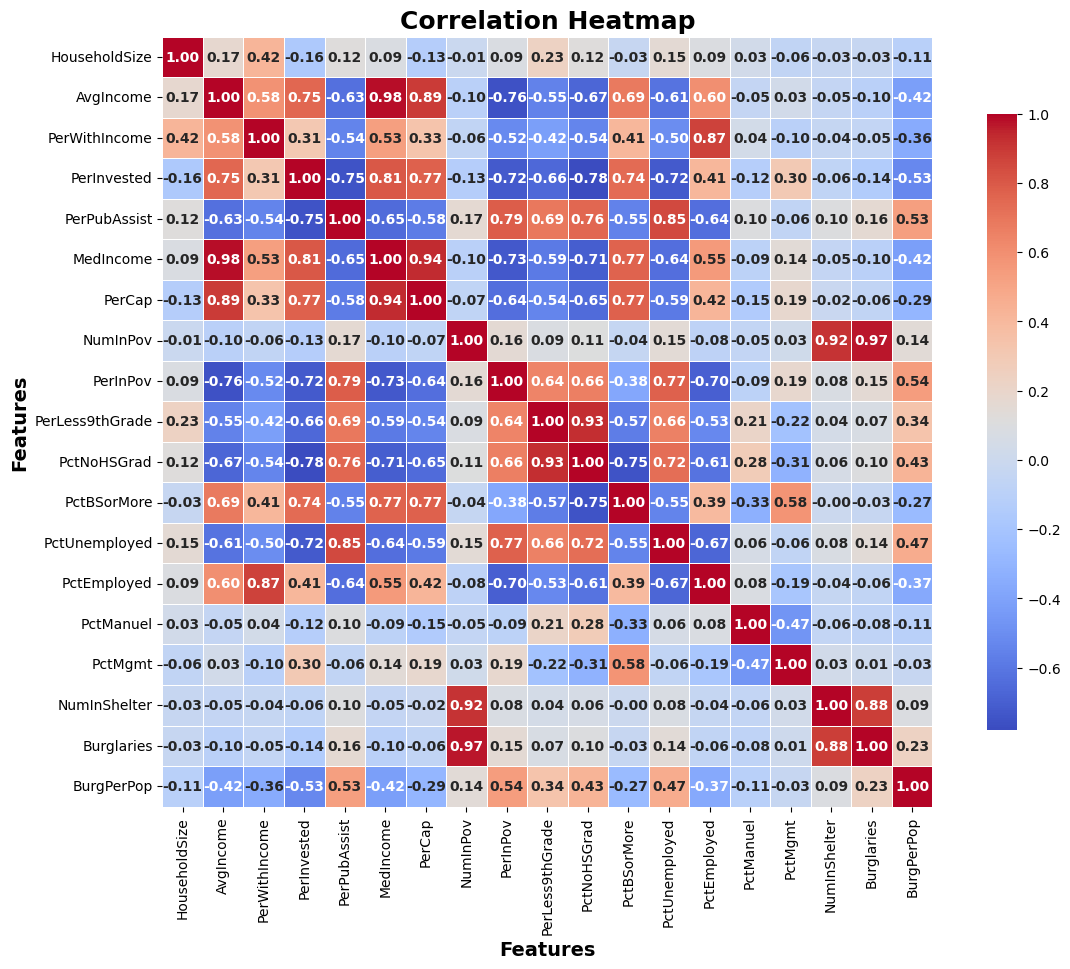

In [12]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = trim.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a heatmap with improved aesthetics
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": .8},
            linecolor='white',  # Color of lines between cells
            annot_kws={"size": 10, "weight": "bold"},  # Annotation properties
            xticklabels=correlation_matrix.columns,  # Ensure columns are labeled
            yticklabels=correlation_matrix.columns  # Ensure rows are labeled
           )

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=18, weight='bold')
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Features', fontsize=14, weight='bold')

plt.show()

In [13]:
# Drop any columns whose correlation with 'BurgPerPop' is less than 0.10
trim.drop(columns = ['PctMgmt', 'NumInShelter'], inplace = True)
places.drop(columns = ['PctMgmt', 'NumInShelter'], inplace = True)

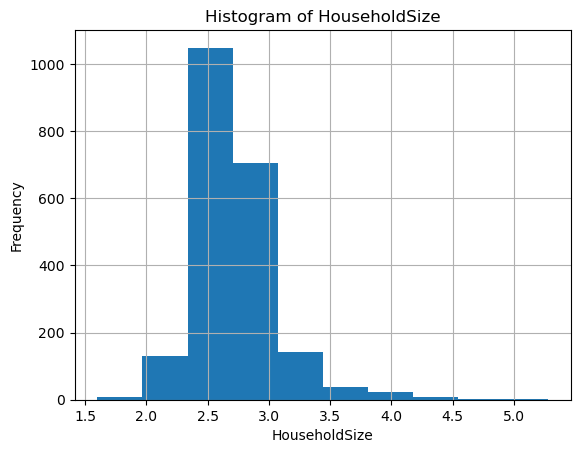

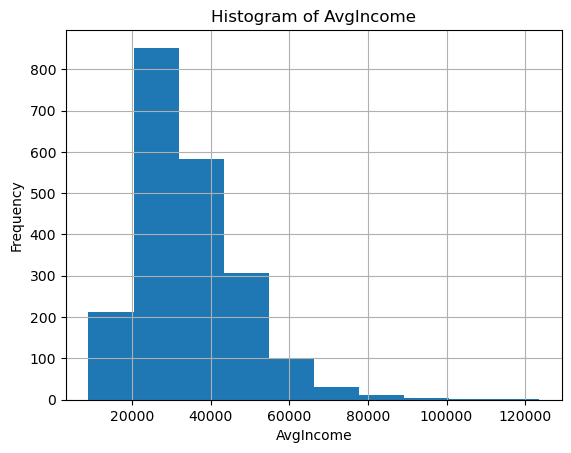

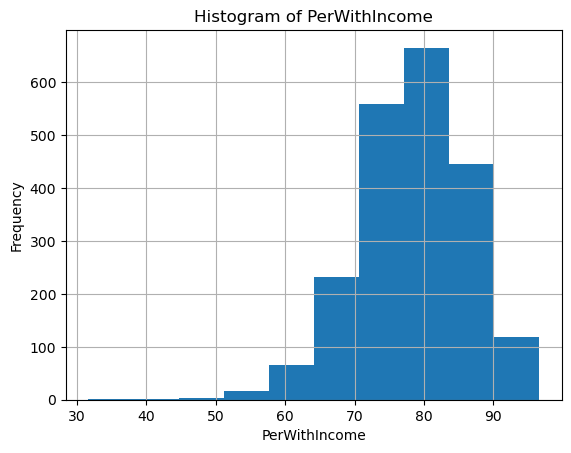

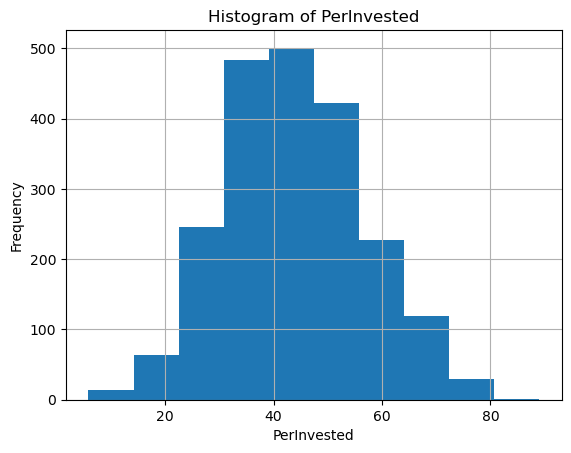

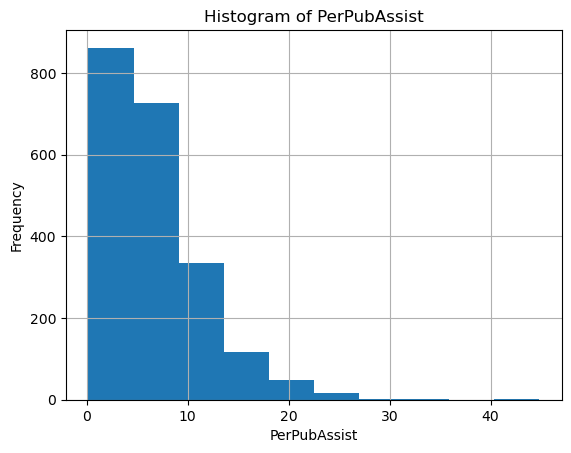

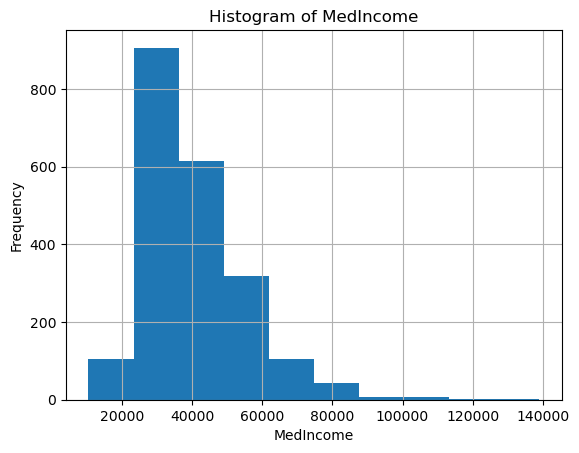

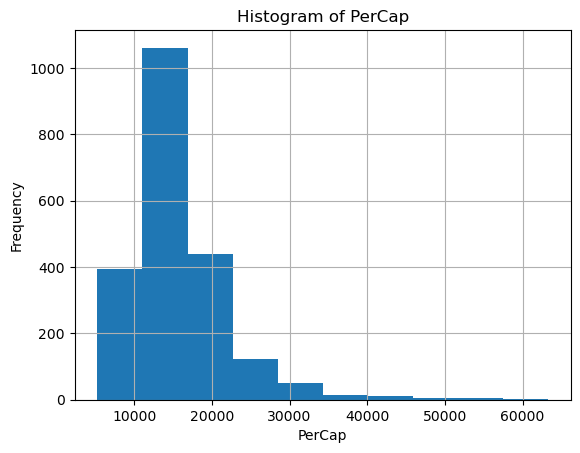

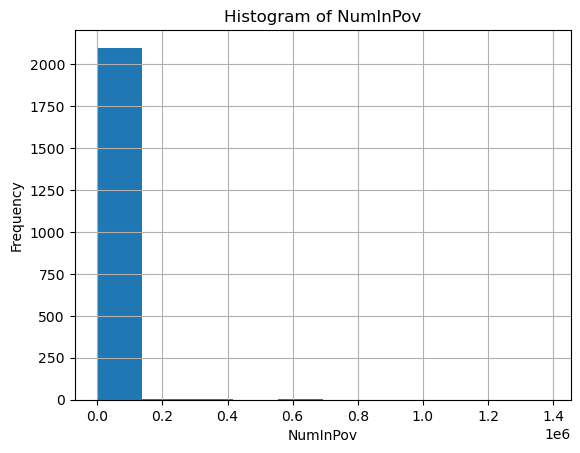

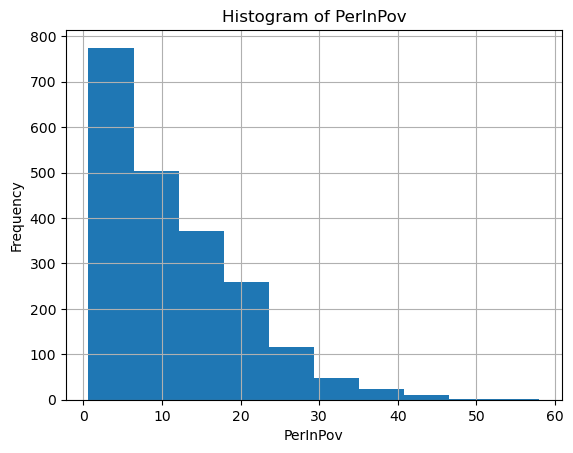

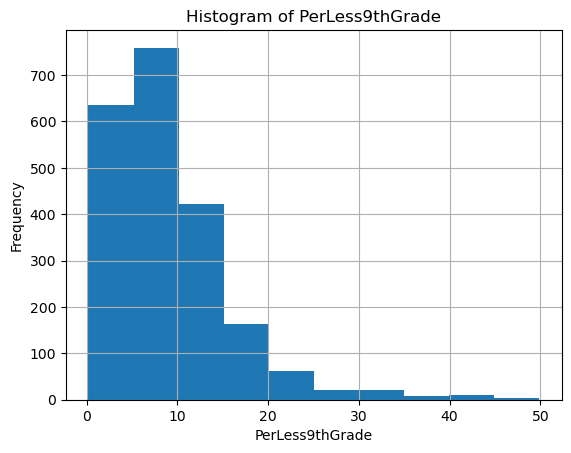

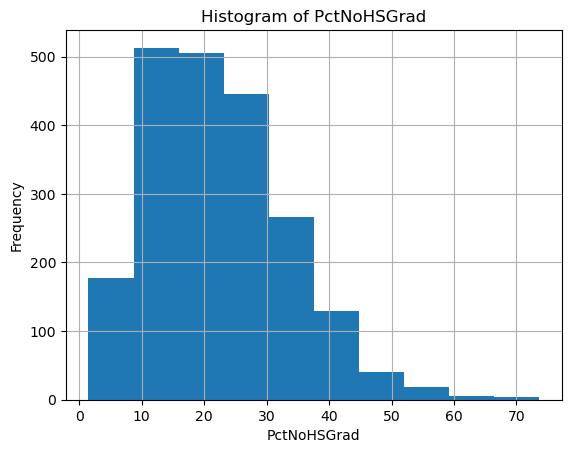

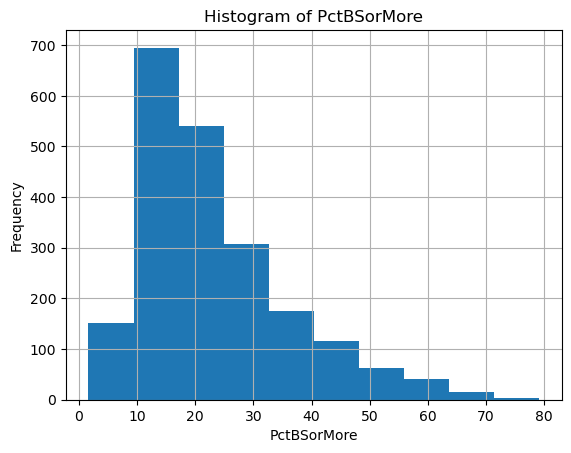

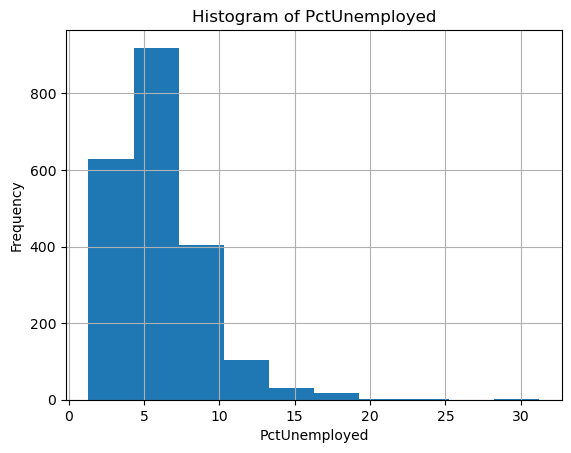

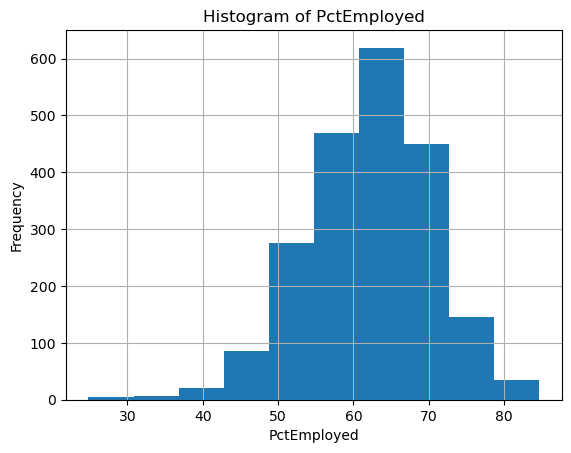

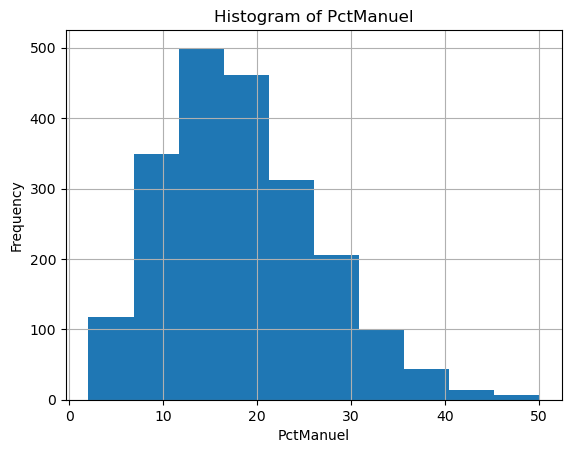

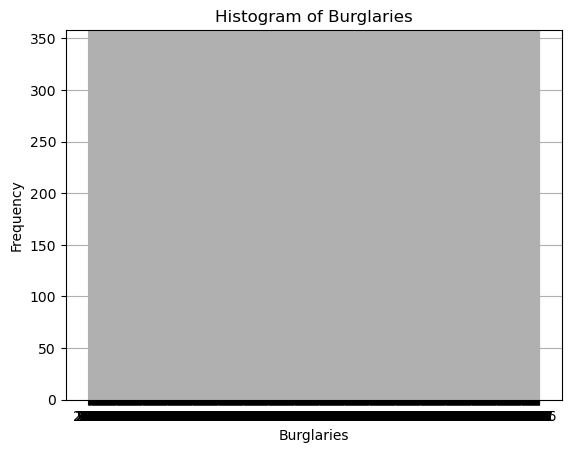

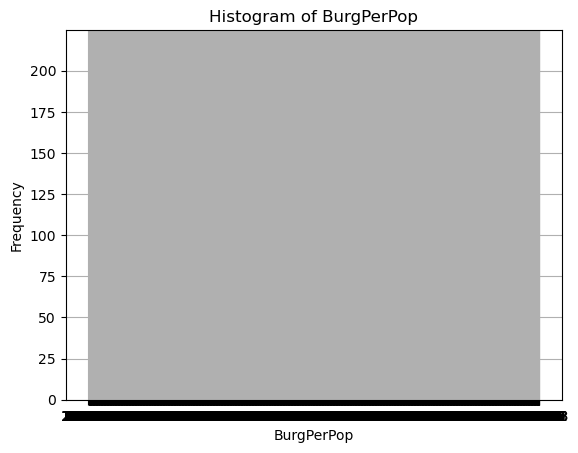

In [14]:
# Create a histogram for each variable, so it can be investigated
for column in trim.columns:
    plt.figure()
    trim[column].hist(bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
# Import neccessary libraries
from sklearn.model_selection import train_test_split

# Define the features and target variable using AvgIncome
avgFeatures = ['AvgIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 'PctEmployed',
            'PerInPov', 'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed',
            'HouseholdSize', 'NumInPov', 'PctManuel']
target = 'BurgPerPop'

# Split the data into training and testing sets
X = trim[avgFeatures]
y = trim[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
# Import neccessary libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [17]:
# Import neccessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
rf_mae = mean_absolute_error(y_test, rf_predictions)  # Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)  # Gradient Boosting evaluation
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_r2 = r2_score(y_test, gbm_predictions)

# Display the evaluation results for both models
print("Random Forest Regression Metrics using Median Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)
print()
print("Gradient Boosting Regression Metrics using Median Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)
print("R²:", gbm_r2)

Random Forest Regression Metrics using Median Income:
MAE: 373.40001707779885
MSE: 488063.70514057565
RMSE: 698.6155631966523
R²: 0.3439482124895581

Gradient Boosting Regression Metrics using Median Income:
MAE: 380.3724620051485
MSE: 487089.8049240958
RMSE: 697.9181935757914
R²: 0.3452573222863916


In [18]:
# Define the features and target using MedIncome
medFeatures = ['PctEmployed', 'MedIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
            'PerInPov', 'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed',
              'HouseholdSize', 'NumInPov', 'PctManuel']
target = 'BurgPerPop'

# Split the data into training and testing sets
X = trim[medFeatures]
y = trim[target]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [19]:
# Initialize the models
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [20]:
# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
rf_mae = mean_absolute_error(y_test, rf_predictions)  # Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

gbm_mae = mean_absolute_error(y_test, gbm_predictions)  # Gradient Boosting evaluation
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(gbm_mse)
gbm_r2 = r2_score(y_test, gbm_predictions)

# Display the evaluation results for both models
print("Random Forest Regression Metrics using Median Income:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R²:", rf_r2)
print()
print("Gradient Boosting Regression Metrics using Median Income:")
print("MAE:", gbm_mae)
print("MSE:", gbm_mse)
print("RMSE:", gbm_rmse)
print("R²:", gbm_r2)

Random Forest Regression Metrics using Median Income:
MAE: 377.9596483870968
MSE: 495305.8964662294
RMSE: 703.7797215508766
R²: 0.31371750861550296

Gradient Boosting Regression Metrics using Median Income:
MAE: 370.86758576189817
MSE: 486636.30400738027
RMSE: 697.5932224494303
R²: 0.3257298621012905


In [21]:
# Convert the 'BurgPerPop' column from object type to float for numerical operations
trim['BurgPerPop'] = trim['BurgPerPop'].astype(float)

# Calculate the 75th percentile (threshold) of 'BurgPerPop' to differentiate high and low burglary rates
threshold = trim['BurgPerPop'].quantile(0.75)

# Create a new column 'BurgClass' that classifies areas as 'High Burglaries' or 'Low Burglaries'
# based on whether 'BurgPerPop' is above or below the threshold
trim['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in trim['BurgPerPop']]

In [22]:
# Split the data into training and testing sets
X = trim[avgFeatures]
y = trim['BurgClass']
X_train, X_test, y_train, y_test = train_test_split(X,y)

                 precision    recall  f1-score   support

High Burglaries       0.51      0.89      0.64       140
 Low Burglaries       0.94      0.69      0.80       387

       accuracy                           0.74       527
      macro avg       0.72      0.79      0.72       527
   weighted avg       0.83      0.74      0.76       527



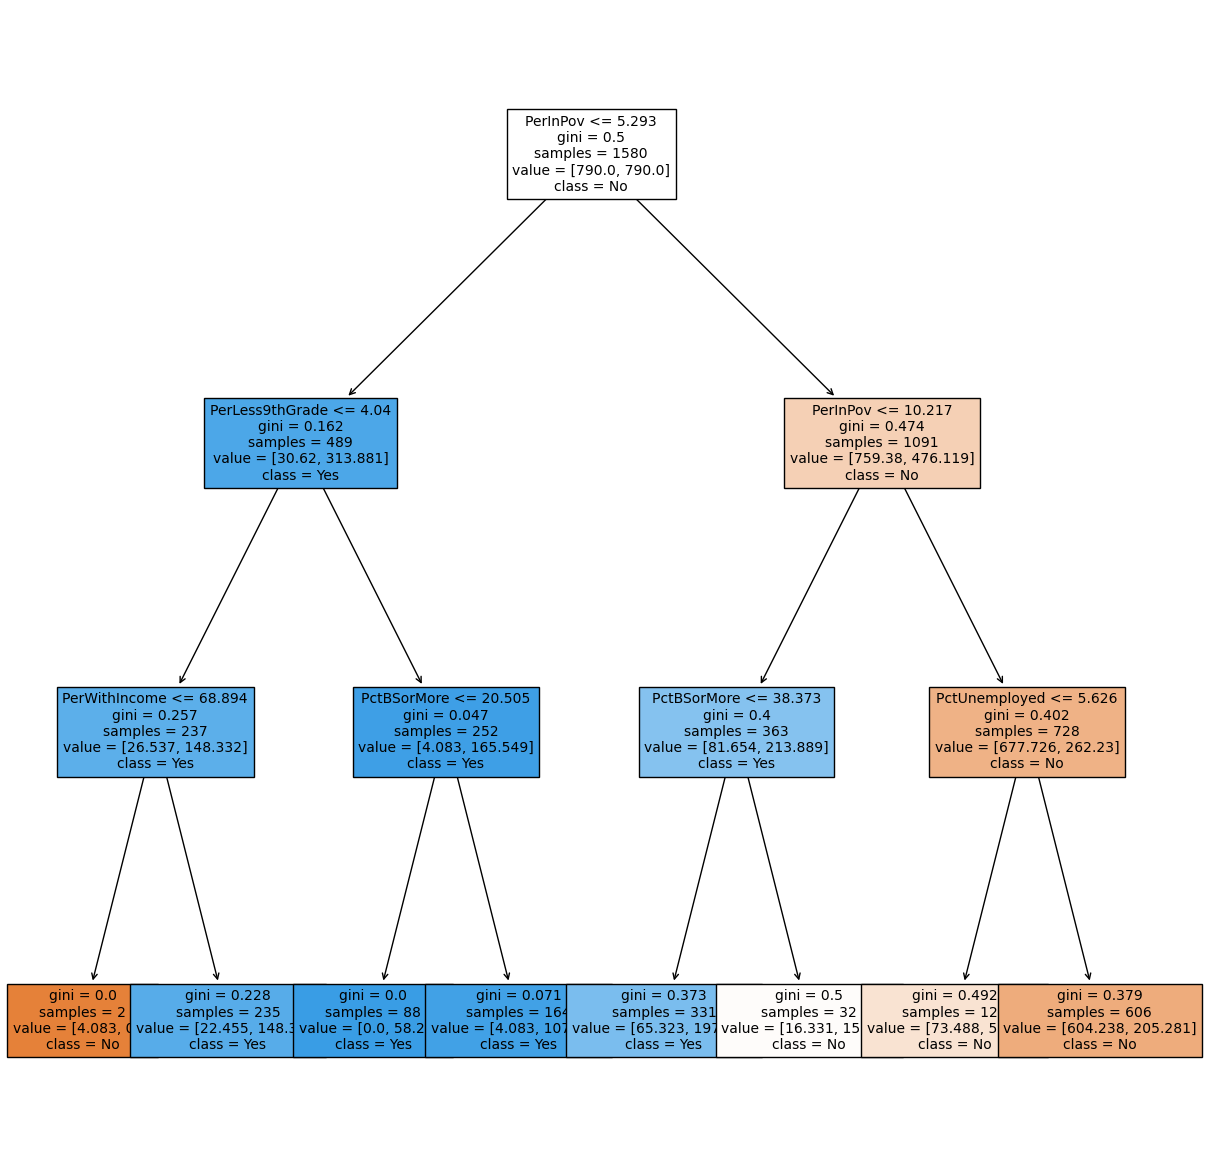

In [23]:
# Import necessary libraries for decision tree modeling and evaluation
from sklearn import tree
from sklearn import metrics

# Define and run a decision tree model with customizable parameters
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Initialize and train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=d, 
                                      class_weight=cw, 
                                      criterion=c, splitter=s, 
                                      min_samples_leaf=msl)
    
    # Train the classifier on the training data
    clf2 = clf.fit(X_train, y_train)

    # Plot the trained decision tree
    plt.figure(figsize=(15,15))
    tree.plot_tree(clf2, 
                   feature_names=avgFeatures, 
                   class_names=['No','Yes'], 
                   filled=True, 
                   fontsize=10)

    # Predict and evaluate model performance on test data
    y_pred = clf2.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

# Run the model
run_model()

In [24]:
# Split the data into training and testing sets
X = trim[medFeatures]
y = trim['BurgClass']
X_train, X_test, y_train, y_test = train_test_split(X,y)

                 precision    recall  f1-score   support

High Burglaries       0.48      0.93      0.63       152
 Low Burglaries       0.95      0.59      0.73       375

       accuracy                           0.69       527
      macro avg       0.72      0.76      0.68       527
   weighted avg       0.82      0.69      0.70       527



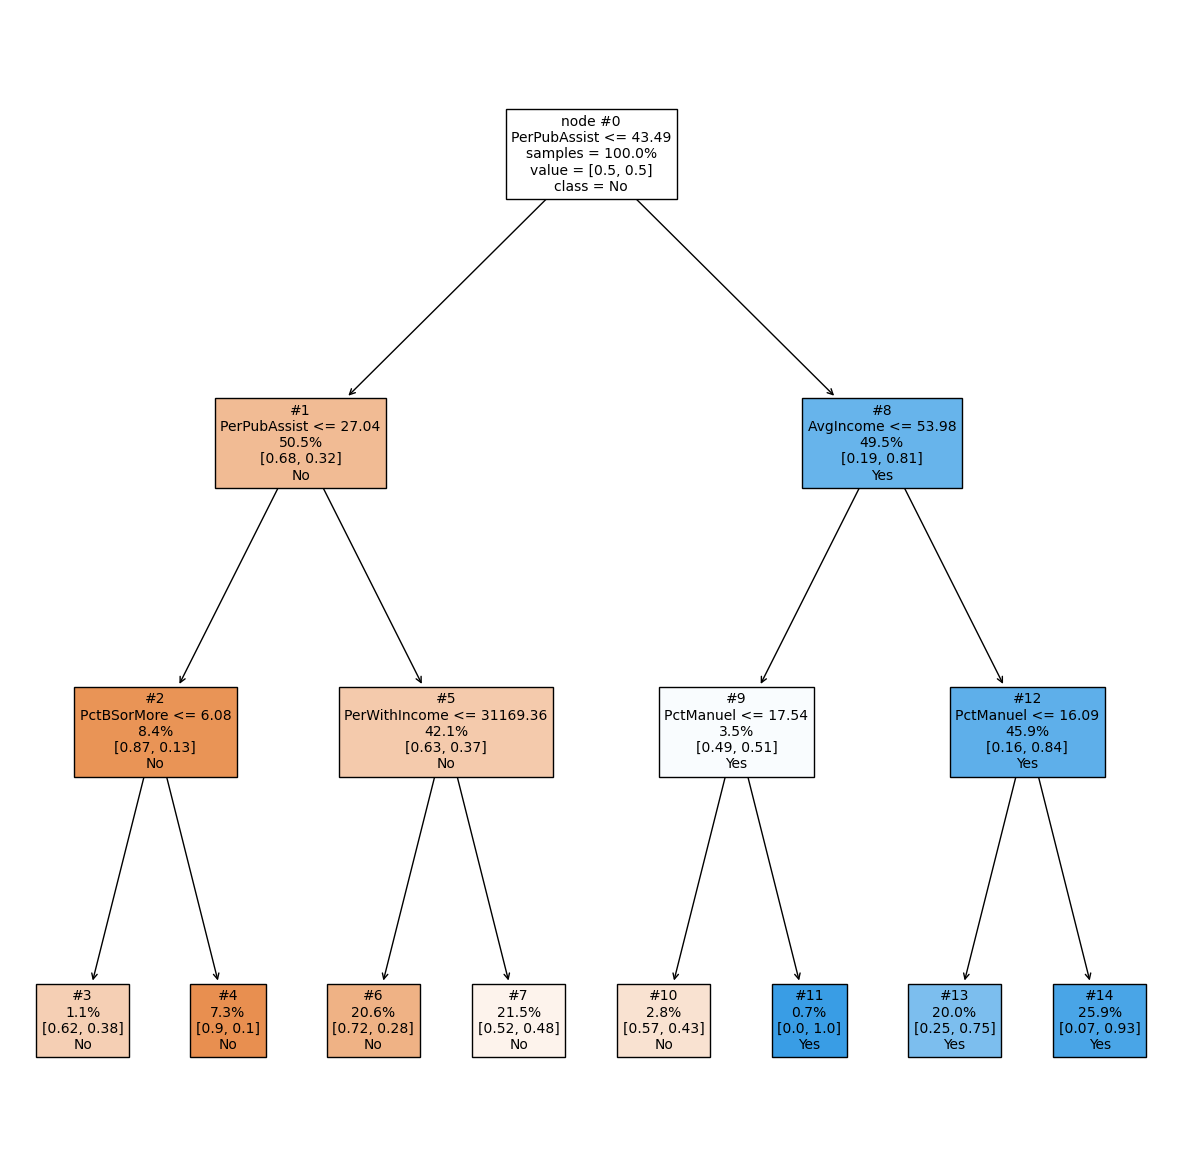

In [25]:
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Initialize and train the decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=d,
                                      class_weight=cw,
                                      criterion=c,
                                      splitter=s,
                                      min_samples_leaf=msl)
    clf2 = clf.fit(X_train, y_train)

    # Plot the trained decision tree
    plt.figure(figsize=(15,15))
    tree.plot_tree(clf2,
               feature_names=avgFeatures,
               class_names=['No','Yes'],
               filled=True, precision=2,
               node_ids=True, fontsize=10,
               label='root', proportion=True,
               impurity=False)

    # Make predictions and print the classification report
    y_pred = clf2.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

# Run the model
run_model()

In [26]:
# Drop 'BurgClass'
trim = trim.drop(columns=['BurgClass'])

In [27]:
# Convert 'Burglaries' and 'BurgPerPop' to float type
trim[['Burglaries', 'BurgPerPop']] = trim[['Burglaries', 'BurgPerPop']].astype(float)
trim.dtypes

HouseholdSize      float64
AvgIncome            int64
PerWithIncome      float64
PerInvested        float64
PerPubAssist       float64
MedIncome            int64
PerCap               int64
NumInPov             int64
PerInPov           float64
PerLess9thGrade    float64
PctNoHSGrad        float64
PctBSorMore        float64
PctUnemployed      float64
PctEmployed        float64
PctManuel          float64
Burglaries         float64
BurgPerPop         float64
dtype: object

In [28]:
def categorize_numerical_columns(df, features):
    # Create a copy of the DataFrame to avoid modifying the original
    df_categorized = pd.DataFrame()
    
    # Loop through each specified numerical column in the features list
    for column in features:
        # Calculate the quartiles
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.75)
        
        # Create a categorical variable based on quartiles
        df_categorized[column] = pd.cut(
            df[column],
            bins=[-float('inf'), q1, q2, float('inf')],
            labels=['Low', 'Medium', 'High']
        )
    
    return df_categorized

# Apply categorize_numerical_columns to 'avgFeatures'
trim_categorized = categorize_numerical_columns(trim, avgFeatures)

In [29]:
# Ensure BurgPerPop is float type
trim['BurgPerPop'] = trim['BurgPerPop'].astype(float)

# Create a new column 'BurgClass' based on the 75th percentile threshold
threshold = trim['BurgPerPop'].quantile(0.75)
trim['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in trim['BurgPerPop']]

# Add the 'BurgClass' column to the categorized DataFrame
trim_categorized['BurgClass'] = trim['BurgClass'].reset_index(drop=True)

# Define the features and target variable for the first test
# We want to use the categorized columns as features
avgFeatures = trim_categorized.columns.drop('BurgClass')  # Only keep the features, drop 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets
X = trim_categorized[avgFeatures]
y = trim_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
# Take a look at the data
trim_categorized.head()

,AvgIncome,PerWithIncome,PerInvested,PerPubAssist,PctEmployed,PerInPov,PerLess9thGrade,PctNoHSGrad,PctBSorMore,PctUnemployed,HouseholdSize,NumInPov,PctManuel,BurgClass
0,High,High,High,Low,Medium,Low,Medium,Low,High,Low,High,Low,Medium,Low Burglaries
1,High,Medium,High,Low,Medium,Low,Medium,Low,High,Low,Medium,Low,Medium,Low Burglaries
2,Medium,Medium,High,Low,High,Medium,Low,Low,High,Low,Low,Medium,Medium,Low Burglaries
4,Low,Low,Medium,High,Low,High,High,Medium,Medium,High,Medium,Medium,Low,High Burglaries
5,Low,Medium,Medium,Medium,Medium,High,Medium,Medium,Medium,Medium,Low,High,Medium,Low Burglaries


In [31]:
# One-hot-encode 'trim_categorized'
trim_dummies = pd.get_dummies(trim_categorized, drop_first=False)

In [32]:
# Create the categorized 'avgFeatures'
avgFeatures = trim_dummies.drop(columns=['BurgClass_High Burglaries','BurgClass_Low Burglaries'])

In [33]:
# Split the data into training and testing sets
X = avgFeatures
y = trim_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)


# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [35]:
from sklearn.metrics import classification_report, accuracy_score

# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
print("Random Forest Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions).round(3))
print("")
print(classification_report(y_test, rf_predictions))
print("")
print("")
print("Gradient Boosting Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, gbm_predictions).round(3))
print("")
print(classification_report(y_test, gbm_predictions))

Random Forest Classification Metrics:
Accuracy: 0.729

              precision    recall  f1-score   support

       False       0.76      0.94      0.84       392
        True       0.40      0.13      0.19       135

    accuracy                           0.73       527
   macro avg       0.58      0.53      0.51       527
weighted avg       0.67      0.73      0.67       527



Gradient Boosting Classification Metrics:
Accuracy: 0.748

              precision    recall  f1-score   support

       False       0.75      1.00      0.85       392
        True       0.75      0.02      0.04       135

    accuracy                           0.75       527
   macro avg       0.75      0.51      0.45       527
weighted avg       0.75      0.75      0.65       527



In [36]:
trim_categorized.head()

,AvgIncome,PerWithIncome,PerInvested,PerPubAssist,PctEmployed,PerInPov,PerLess9thGrade,PctNoHSGrad,PctBSorMore,PctUnemployed,HouseholdSize,NumInPov,PctManuel,BurgClass
0,High,High,High,Low,Medium,Low,Medium,Low,High,Low,High,Low,Medium,Low Burglaries
1,High,Medium,High,Low,Medium,Low,Medium,Low,High,Low,Medium,Low,Medium,Low Burglaries
2,Medium,Medium,High,Low,High,Medium,Low,Low,High,Low,Low,Medium,Medium,Low Burglaries
4,Low,Low,Medium,High,Low,High,High,Medium,Medium,High,Medium,Medium,Low,High Burglaries
5,Low,Medium,Medium,Medium,Medium,High,Medium,Medium,Medium,Medium,Low,High,Medium,Low Burglaries


              precision    recall  f1-score   support

       False       0.75      0.48      0.58       392
        True       0.26      0.53      0.35       135

    accuracy                           0.49       527
   macro avg       0.50      0.50      0.47       527
weighted avg       0.62      0.49      0.52       527



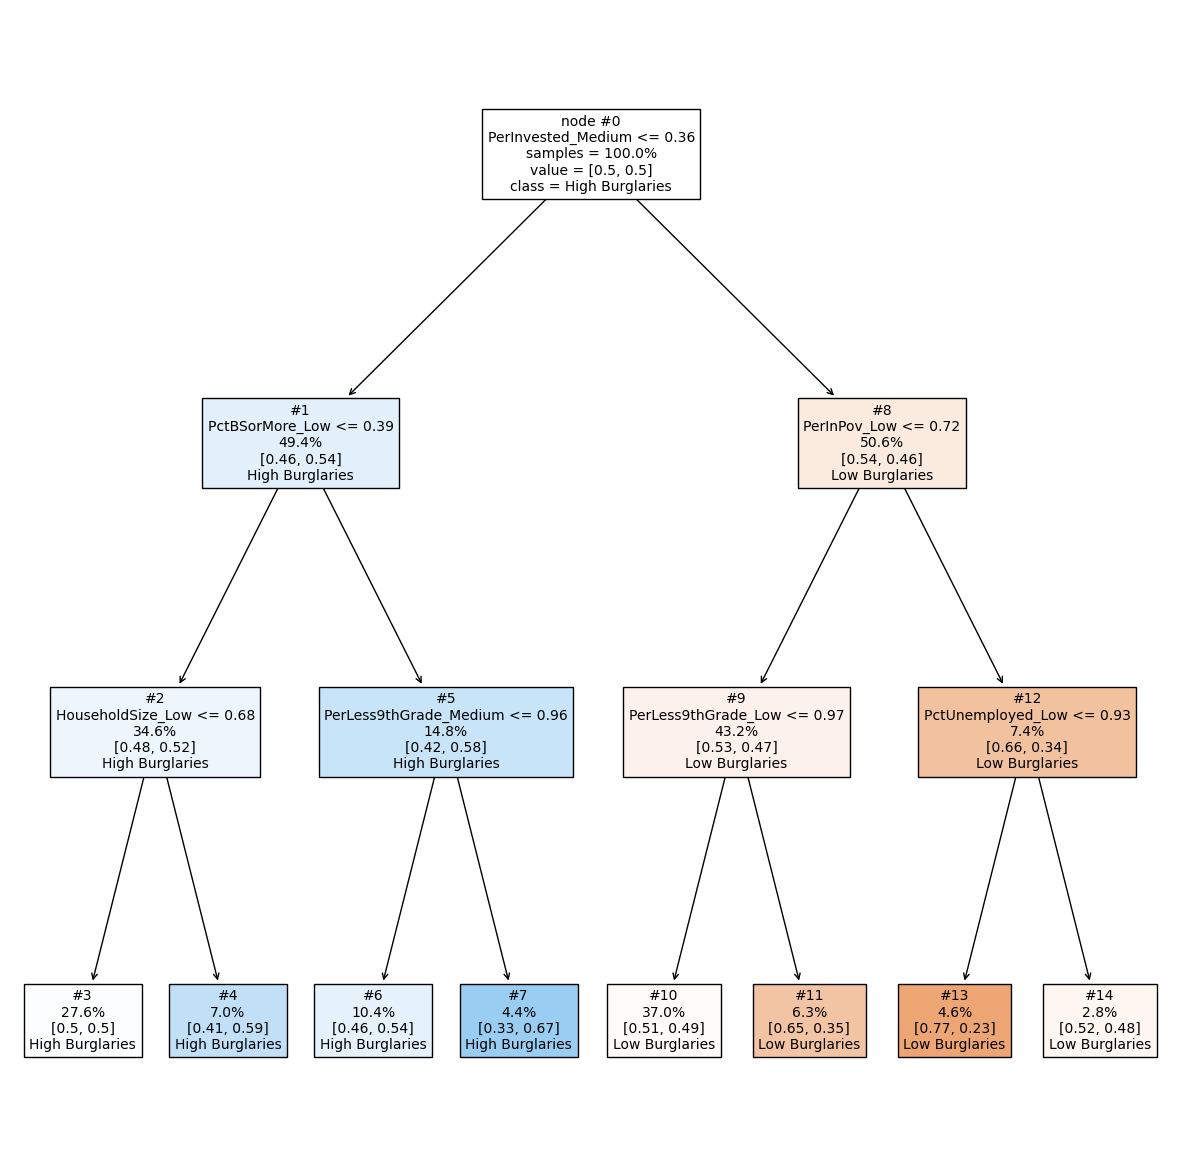

In [37]:
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    # Attempt to run the decision tree model with the provided parameters
    try:
        # Initialize and train the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=d,
                                           class_weight=cw,
                                           criterion=c,
                                           splitter=s,
                                           min_samples_leaf=msl)
        clf2 = clf.fit(X_train, y_train)

        # Plot the trained decision tree
        plt.figure(figsize=(15, 15))
        tree.plot_tree(clf2,
                       feature_names=X_train.columns.tolist(),
                       class_names=['Low Burglaries', 'High Burglaries'],
                       filled=True, precision=2,
                       node_ids=True, fontsize=10,
                       label='root', proportion=True,
                       impurity=False)

        # Make predictions and print the classification report
        y_pred = clf2.predict(X_test)
        print(metrics.classification_report(y_test, y_pred))

    except Exception as e:
        # Handle any errors that occur during model training or evaluation
        print(f"An error occurred: {e}")

# Run the model
run_model()

In [38]:
# Categorize numerical columns in the DataFrame
trim_categorized = categorize_numerical_columns(trim, medFeatures)

# Add the 'BurgClass' column back to the categorized DataFrame for classification
trim_categorized['BurgClass'] = trim['BurgClass'].reset_index(drop=True)

# Define the features and target variable for the first test
medFeatures = trim_categorized.columns.drop('BurgClass')  # Keep only feature columns, excluding 'BurgClass'
target = 'BurgClass'

# Split the data into training and testing sets
X = trim_categorized[medFeatures]
y = trim_categorized[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
# Convert categorical variables in the DataFrame to one-hot encoded dummy variables
trim_dummies = pd.get_dummies(trim_categorized, drop_first=False)

In [40]:
# Define the feature set by dropping specific target class columns from the one-hot encoded DataFrame
medFeatures = trim_dummies.drop(columns=['BurgClass_High Burglaries', 'BurgClass_Low Burglaries'])

In [41]:
# Split the data into training and testing sets
X = medFeatures
y = trim_dummies['BurgClass_High Burglaries']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [42]:
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)


# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
print("Random Forest Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions).round(3))
print("")
print(classification_report(y_test, rf_predictions))
print("")
print("")
print("Gradient Boosting Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, gbm_predictions).round(3))
print("")
print(classification_report(y_test, gbm_predictions))

Random Forest Classification Metrics:
Accuracy: 0.683

              precision    recall  f1-score   support

       False       0.73      0.90      0.81       385
        True       0.26      0.10      0.14       142

    accuracy                           0.68       527
   macro avg       0.50      0.50      0.47       527
weighted avg       0.60      0.68      0.63       527



Gradient Boosting Classification Metrics:
Accuracy: 0.721

              precision    recall  f1-score   support

       False       0.73      0.98      0.84       385
        True       0.22      0.01      0.03       142

    accuracy                           0.72       527
   macro avg       0.48      0.50      0.43       527
weighted avg       0.59      0.72      0.62       527



              precision    recall  f1-score   support

       False       0.73      0.76      0.74       385
        True       0.26      0.23      0.24       142

    accuracy                           0.62       527
   macro avg       0.49      0.49      0.49       527
weighted avg       0.60      0.62      0.61       527



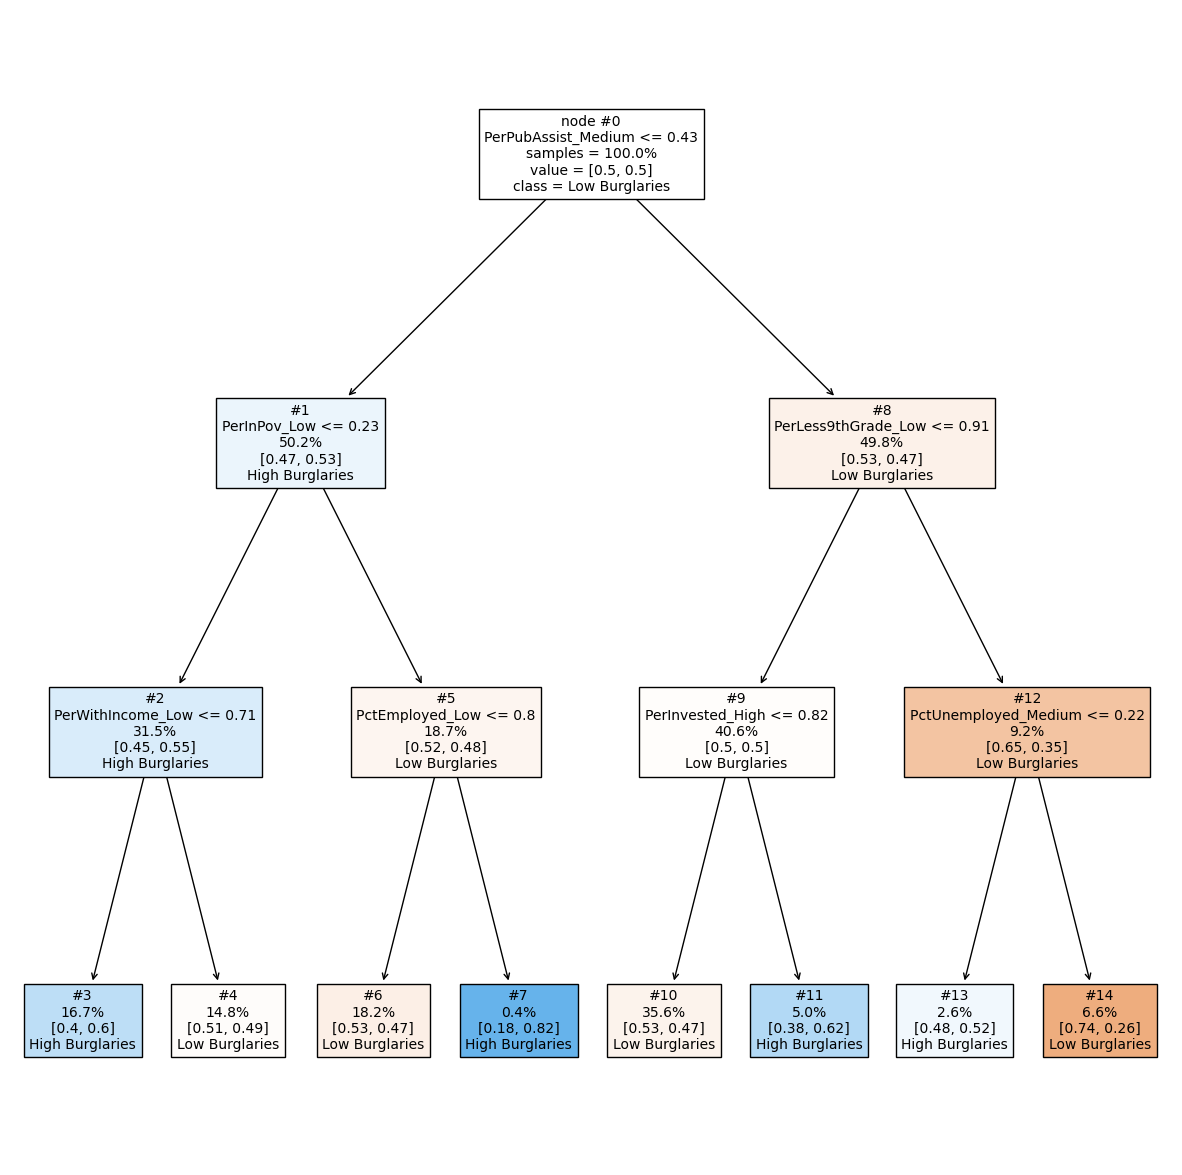

In [44]:
# Define and run a decision tree model with customizable parameters
def run_model(d=3, cw='balanced', c='gini', s='random', msl=1):
    try:
        # Initialize and train the decision tree classifier
        clf = tree.DecisionTreeClassifier(max_depth=d,
                                           class_weight=cw,
                                           criterion=c,
                                           splitter=s,
                                           min_samples_leaf=msl)

        clf2 = clf.fit(X_train, y_train)

        # Visualize the trained decision tree
        plt.figure(figsize=(15, 15))
        tree.plot_tree(clf2,
                       feature_names=X_train.columns.tolist(),
                       class_names=['Low Burglaries', 'High Burglaries'],
                       filled=True, precision=2,
                       node_ids=True, fontsize=10,
                       label='root', proportion=True,
                       impurity=False)

        # Predict and evaluate model performance
        y_pred = clf2.predict(X_test)
        print(metrics.classification_report(y_test, y_pred))

    except Exception as e:
        # Handle any errors that occur during model training or evaluation
        print(f"An error occurred: {e}")

# Run the model
run_model()

In [45]:
# Set up for a correlation test, to see if an area's turnover is corrlated with its burglary rates
corrtest = places.drop(columns=['PctEmployed', 'AvgIncome', 'PerWithIncome', 'PerInvested',
       'PerPubAssist', 'MedIncome', 'PerCap', 'PerInPov',
       'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed',
       'HouseholdSize', 'NumInPov', 'PctManuel', 'Burglaries'])

In [46]:
# Test correlation
corrtest.corr()

,PctSameHouse85,PctSameCity85,PctSameState85,BurgPerPop
PctSameHouse85,1.000000,0.804595,0.656415,-0.204957
PctSameCity85,0.804595,1.000000,0.725802,0.010459
PctSameState85,0.656415,0.725802,1.000000,-0.060021
BurgPerPop,-0.204957,0.010459,-0.060021,1.000000


## Places where people don't move have more burglaries

In [47]:
# Convert 'Burglaries' and 'BurgPerPop' into float type
places[['Burglaries', 'BurgPerPop']] = places[['Burglaries', 'BurgPerPop']].astype(float)

In [48]:
# Define the features and target variable for the first test, using MedIncome
medFeatures = ['PctEmployed', 'MedIncome', 'PerWithIncome', 'PerInvested', 'PerPubAssist', 
            'PerInPov', 'PerLess9thGrade', 'PctNoHSGrad', 'PctBSorMore', 'PctUnemployed',
            'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'NumInPov', 'HouseholdSize', 'PctManuel',
              'HouseholdSize', 'NumInPov', 'PctManuel']

In [49]:
# Categorize numerical columns based on quartiles
def categorize_numerical_columns(df, features):
    # Create a copy of the DataFrame to avoid modifying the original
    df_categorized = pd.DataFrame()
    
    # Loop through each specified numerical column in the features list
    for column in features:
        # Calculate the quartiles
        q1 = df[column].quantile(0.25)
        q2 = df[column].quantile(0.75)
        
        # Create a categorical variable based on quartiles
        df_categorized[column] = pd.cut(
            df[column],
            bins=[-float('inf'), q1, q2, float('inf')],
            labels=['Low', 'Medium', 'High']
        )
    
    return df_categorized

# Apply categorization to the specified DataFrame
places_categorized = categorize_numerical_columns(places, medFeatures)

In [50]:
# Ensure BurgPerPop is float type for accurate calculations
places['BurgPerPop'] = places['BurgPerPop'].astype(float)

# Create a new column 'BurgClass' based on the 75th percentile threshold for burglary classification
threshold = places['BurgPerPop'].quantile(0.75)
places['BurgClass'] = ['High Burglaries' if x >= threshold else 'Low Burglaries' for x in places['BurgPerPop']]

# Categorize numerical columns using the predefined function
places_categorized = categorize_numerical_columns(places, medFeatures)

# Ensure that both DataFrames have the same index
# Add the 'BurgClass' column directly from the original DataFrame
places_categorized['BurgClass'] = places['BurgClass'].values  # Use .values to align indices

# Convert 'BurgClass' to categorical type for better handling
places_categorized['BurgClass'] = places_categorized['BurgClass'].astype('category')

# If you want to encode 'BurgClass' as numerical values for modeling
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'BurgClass' column
places_categorized['BurgClass'] = le.fit_transform(places_categorized['BurgClass'])

# Define features and target variable for the model training
medFeatures = places_categorized.columns.drop('BurgClass')  # Keep only features, exclude 'BurgClass'
target = 'BurgClass'

In [51]:
# One-hot-encode the categorized DataFrame
places_dummies = pd.get_dummies(places_categorized, drop_first=False)

In [52]:
# Split the data into features (X) and target (y) after one-hot encoding
X = places_dummies.drop(columns='BurgClass')  # Use all features except 'BurgClass'
y = places_dummies['BurgClass']  # Use the encoded BurgClass as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)


# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [54]:
# Generate predictions from the trained models
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate and calculate performance metrics for each model
print("Random Forest Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions).round(3))
print("")
print(classification_report(y_test, rf_predictions))
print("")
print("")
print("Gradient Boosting Classification Metrics:")
print("Accuracy:", accuracy_score(y_test, gbm_predictions).round(3))
print("")
print(classification_report(y_test, gbm_predictions))

Random Forest Classification Metrics:
Accuracy: 0.808

              precision    recall  f1-score   support

           0       0.66      0.53      0.59       109
           1       0.85      0.90      0.87       313

    accuracy                           0.81       422
   macro avg       0.75      0.72      0.73       422
weighted avg       0.80      0.81      0.80       422



Gradient Boosting Classification Metrics:
Accuracy: 0.827

              precision    recall  f1-score   support

           0       0.70      0.57      0.63       109
           1       0.86      0.92      0.89       313

    accuracy                           0.83       422
   macro avg       0.78      0.74      0.76       422
weighted avg       0.82      0.83      0.82       422

